In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2348,ham,That seems unnecessarily affectionate,NaN,NaN,NaN
2157,ham,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
207,ham,"Aight yo, dats straight dogg",NaN,NaN,NaN
893,ham,It's ok i noe u're busy but i'm really too bor...,NaN,NaN,NaN
1860,ham,"It could work, we'll reach a consensus at the ...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

<!-- 1) DATA CLEANING
 2) EDA
 3) TEXT PREPROCESSING
 4) MODEL BUILDING
 5) EVALUATION
 6) IMPROVEMENTS
 7) WEBSITE
 8) DEPLOYEMENT -->

# DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# DROP THE LAST 3 COLS
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
2542,ham,Aiyo please Ì_ got time meh.
2252,ham,Den wat will e schedule b lk on sun?
211,ham,Home so we can always chat
4735,ham,"Not for possession, especially not first offense"
5363,ham,"I think your mentor is , but not 100 percent s..."


In [7]:
# RENAMING THE FIRST 2 COLS
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
339,ham,U calling me right? Call my hand phone...
2902,ham,Tell me pa. How is pain de.
3991,ham,"Dizzamn, aight I'll ask my suitemates when I g..."
3696,spam,You are a winner you have been specially selec...
5354,ham,Aiyo cos i sms Ì_ then Ì_ neva reply so i wait...


In [8]:
# PASSES ALL METHODS OF LABELENCODER TO ENCODER
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
# USED TO CONVERT THE TEXT VALUES OF A COL TO 0'S AND 1'S HAM=0, SPAM=1
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
1458,0,"Fighting with the world is easy, u either win ..."
3979,1,ringtoneking 84484
3975,0,I wish u were here. I feel so alone
3442,0,Your board is working fine. The issue of overh...
3714,0,"I am late,so call you tomorrow morning.take ca..."


In [10]:
# CHECK NULL VALUES
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# CHECK DUPLICATE VALUES
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()
df.shape

(5169, 2)

# EDA

In [13]:
# values for ham, spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

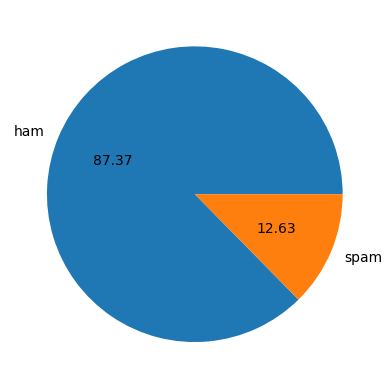

In [14]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91885\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['num_characters'] = df['text'].apply(len)
df

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [17]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [18]:
df['num_sentence'] = df['text'].apply(lambda x:(nltk.sent_tokenize(x)))
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,"[Go until jurong point, crazy.., Available onl..."
1,0,Ok lar... Joking wif u oni...,29,8,"[Ok lar..., Joking wif u oni...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,[Free entry in 2 a wkly comp to win FA Cup fin...
3,0,U dun say so early hor... U c already then say...,49,13,[U dun say so early hor... U c already then sa...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,"[Nah I don't think he goes to usf, he lives ar..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,[This is the 2nd time we have tried 2 contact ...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,[Will Ì_ b going to esplanade fr home?]
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,"[Pity, * was in mood for that., So...any other..."
5570,0,The guy did some bitching but I acted like i'd...,125,27,[The guy did some bitching but I acted like i'...


In [19]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [20]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [21]:
# HAM
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
# SPAM
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [23]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

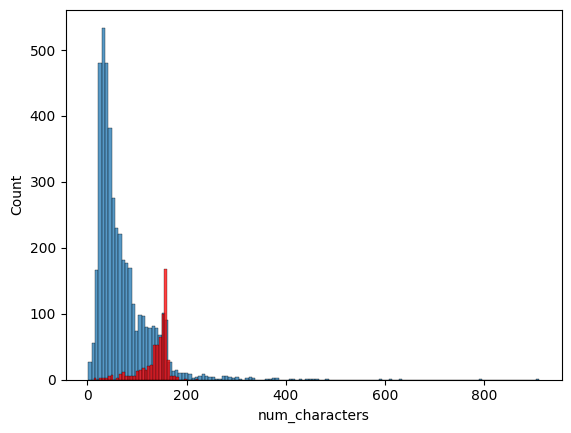

In [24]:
# sns.histplot(df['target'] == 0['num_characters'])
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

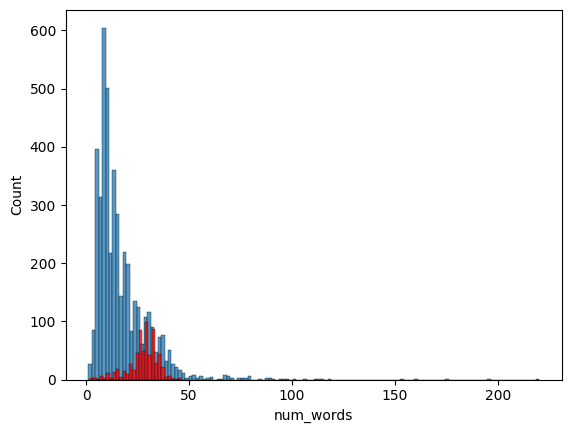

In [25]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

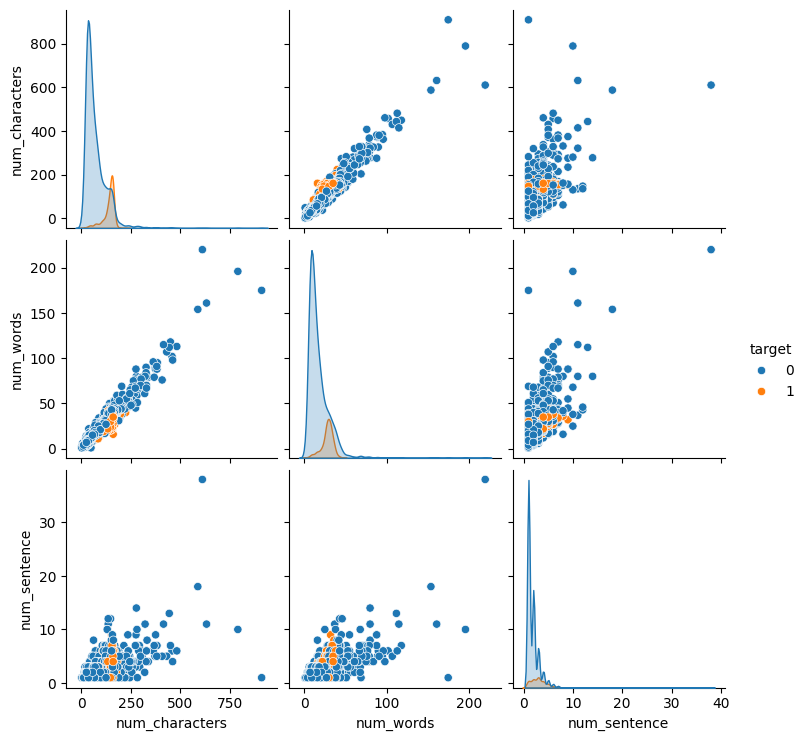

In [26]:
sns.pairplot(df,hue='target')

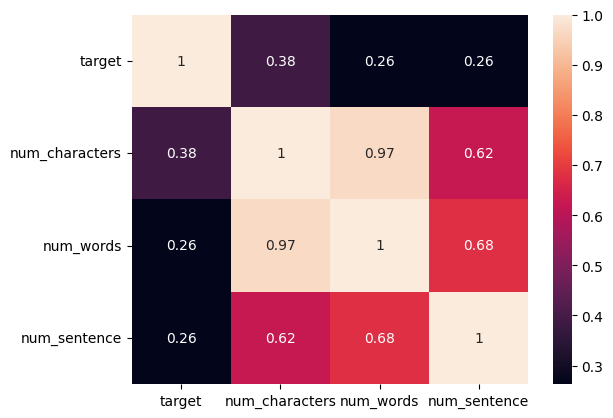

In [27]:
# Exclude non-numeric columns from correlation computation
numeric_columns = df.select_dtypes(include=np.number)

# Plot correlation heatmap
sns.heatmap(numeric_columns.corr(), annot=True)
plt.show()


#DATA PREPROCESSING
lower case
tokenization
removing special characters
removing stop words and punctuation
stemming

In [28]:
import nltk
nltk.download('stopwords')
# stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91885\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
import string

In [30]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [85]:
import nltk
nltk.download('stopwords')
# stopwords.words('english')

def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    text = y[:]
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91885\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91885\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
transform("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [34]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [35]:
df['transform'] = df['text'].apply(transform)
df.head()

,target,text,num_characters,num_words,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [36]:
from wordcloud import WordCloud 
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [37]:
spam_wc = wc.generate(df[df['target'] == 1 ]['transform'].str.cat(sep=" "))

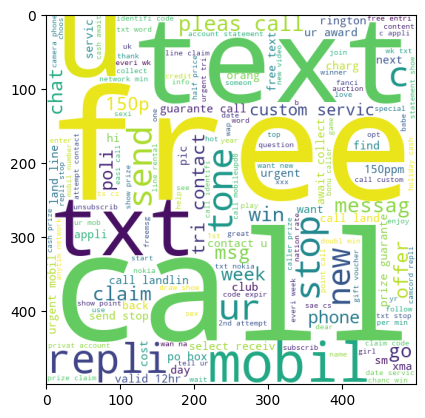

In [38]:
plt.imshow(spam_wc)

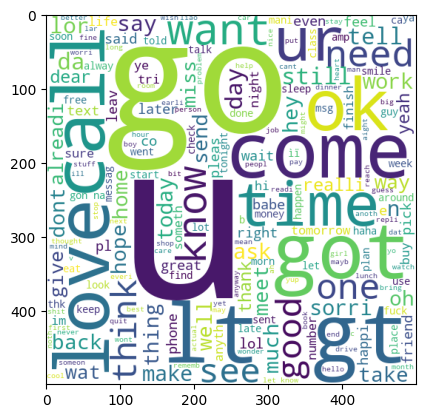

In [84]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")
ham_wc = wc.generate(df[df['target'] == 0 ]['transform'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9939

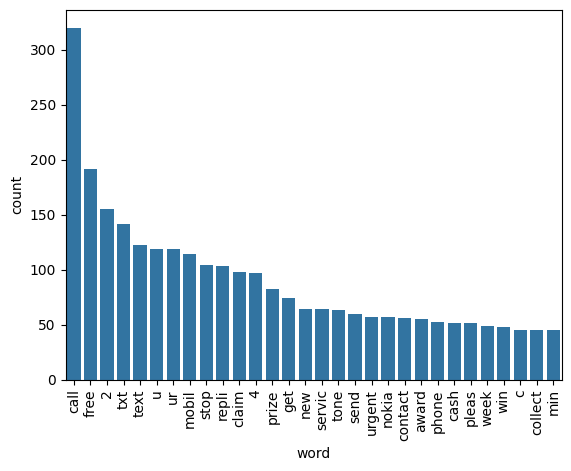

In [42]:
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation="vertical")
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform'].to_list():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

35404

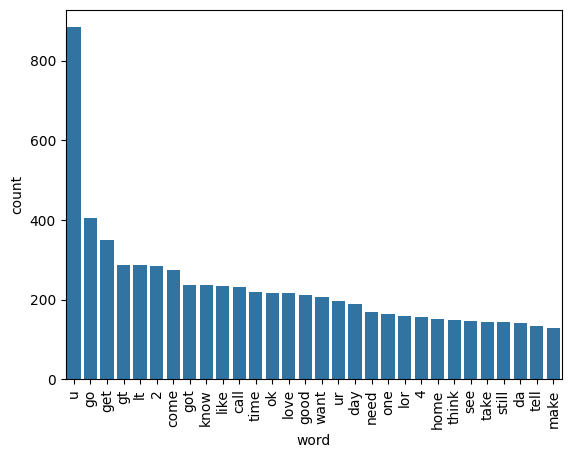

In [81]:
from collections import Counter
most_common_words = Counter(ham_corpus).most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
sns.barplot(x='word', y='count', data=most_common_df)
plt.xticks(rotation="vertical")
plt.show()

In [45]:
# Text vectorization
# using bag of words
df.head()

,target,text,num_characters,num_words,num_sentence,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#4) MODEL BUILDING
UNDERSTAND THE WHOLE MODEL FROM GPT ALSO 

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [47]:
X = tfidf.fit_transform(df['transform']).toarray()

In [48]:
# THIS LED TO DEGRADATION IN THE PRECISION AND ACCURACY OF THE SCORES SO NO NEED FOR THIS 

#  from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [49]:
# append the num_char col to x
# X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))

In [50]:
X.shape

(5169, 3000)

In [51]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [54]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [55]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [56]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [57]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [58]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [59]:
# tfidf == MNb

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [61]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [62]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [63]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred1 = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred1)
    precision = precision_score(y_test,y_pred1)
    return accuracy,precision


# def train_classifier(clf, X_train, y_train, X_test, y_test):
#     clf.fit(X_train, y_train)
#     y_pred1 = clf.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred1)
#     precision = precision_score(y_test, y_pred1, average='weighted', zero_division=0)
#     return accuracy, precision

In [64]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [65]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, currect_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print("NAME", name)
    print("Accuracy", current_accuracy)
    print("Precision", currect_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(currect_precision)


NAME SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
NAME KN
Accuracy 0.9052224371373307
Precision 1.0
NAME NB
Accuracy 0.9709864603481625
Precision 1.0
NAME DT
Accuracy 0.9323017408123792
Precision 0.8333333333333334
NAME LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
NAME RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829


C:\Users\91885\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


NAME AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
NAME BgC
Accuracy 0.9584139264990329
Precision 0.8682170542635659
NAME ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
NAME GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192
NAME xgb
Accuracy 0.9671179883945842
Precision 0.9262295081967213


In [66]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [67]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


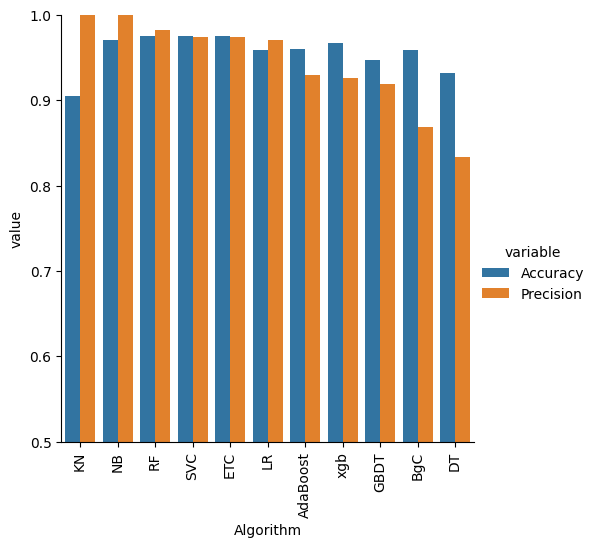

In [68]:
sns.catplot(x = 'Algorithm', y ='value', hue = 'variable', data=performance_df1, height=5, kind='bar')
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# model improve
# 1. Change the max_features parameter of TfIdf

In [69]:
temp_df = pd.DataFrame({'Algorithms':clfs.keys(), 'Accuracy_max_3000':accuracy_scores, 'Precision_max_3000':precision_scores}).sort_values('Precision_max_3000',ascending=False)
temp_df

,Algorithms,Accuracy_max_3000,Precision_max_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [70]:
# VOTING CLASSIFIER 
# TAKE THE BEST MODELS AND COLLECTIVELY RUN THEM TO CHECK IMPROVEMENT ON THE MODEL IF ANY 
svc = SVC(kernel='sigmoid', probability=True, gamma=1.0)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [71]:
voting = VotingClassifier(estimators=[('svm', svc),('nb',mnb),('rf',etc)], voting='soft')

In [72]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
# SAME AS ABOVE, NOT NECESSARY
# VotingClassifier(estimators=[('svm',SVC(kernel='sigmoid', probability=True, gamma=1.0)),('nb',MultinomialNB()),('rf',RandomForestClassifier(n_estimators=50, random_state=2))], voting='soft')

In [74]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_pred, y_test))
print('Precision',precision_score(y_pred, y_test))

Accuracy 0.9825918762088974
Precision 0.8768115942028986


In [75]:
# STACK THEM TO CREATE A META MODEL FROM THE BASE MODELS 
estimators = [('svm', svc),('nb',mnb),('rf',etc)]
final_estimator = RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [83]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [78]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test, y_pred))
print('Precision',precision_score(y_test, y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [82]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))